## Breast Cancer Prediction and Detection
### via Machine Learning and Deep Learning  

### David Kinney - DSC680 - Spring 2021 - Professor Catherine Williams
**********************************************************************

In [1]:
# Import packages
import pandas as pd
from pycaret.classification import *

## Breast Cancer Prediction - Machine Learning

In [2]:
# Read the Breast Cancer Wisconsin (Diagnostic) dataset
df = pd.read_csv('./data/data.csv')
df.shape

(569, 33)

### Exploratory Data Analysis

In [3]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

***********************************************
### Machine Learning Model Selection, Training and Tuning  

#### PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.  

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.  

(Source: https://pycaret.readthedocs.io/en/latest/index.html)  

**Functions used**  
* `setup` - initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.  
* `compare_models` - trains all models in the model library and scores them using stratified cross validation for metric evaluation.  
* `create_model` - trains and evaluates a model using cross validation.  
* `tune_model` - automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space.  
* `plot_model` - used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.  
* `predict_model` - predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.  

#### Initialize PyCaret

In [6]:
clf1 = setup(df, target = 'diagnosis')

#### Compare Baseline

In [7]:
%%time
best_model = compare_models()

Wall time: 41.5 s


**Create best model from baseline results**

In [9]:
%%time
model = create_model('catboost')

Wall time: 25.6 s


**Tune hyperparameters**

In [10]:
%%time
tuned_model = tune_model(model)

Wall time: 33 s


#### Plot Results

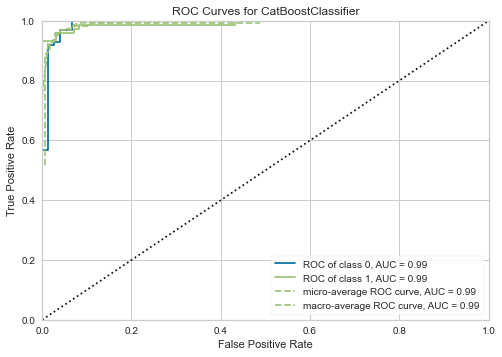

In [13]:
plot_model(model)

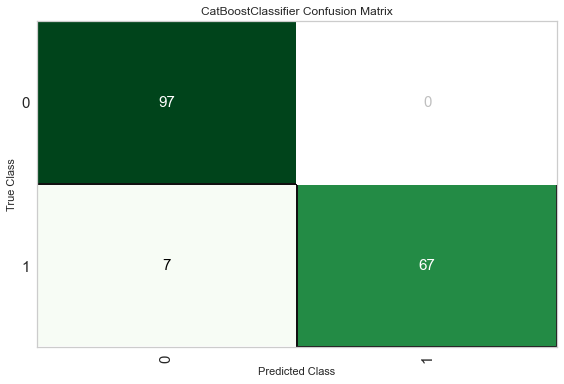

In [24]:
plot_model(model, plot = 'confusion_matrix')

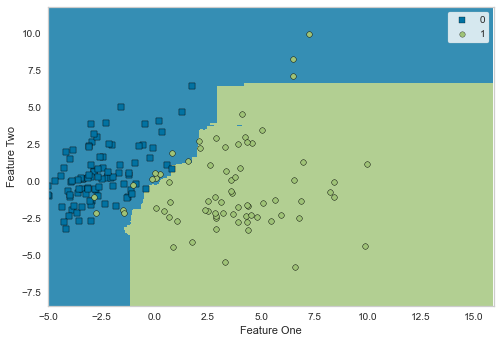

In [25]:
plot_model(model, plot = 'boundary')

In [19]:
plot_model(model, plot = 'feature')

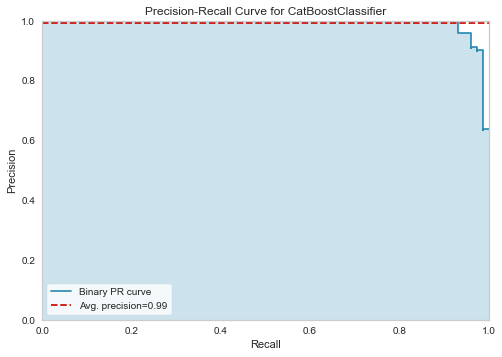

In [26]:
plot_model(model, plot = 'pr')

In [27]:
plot_model(model, plot = 'class_report')

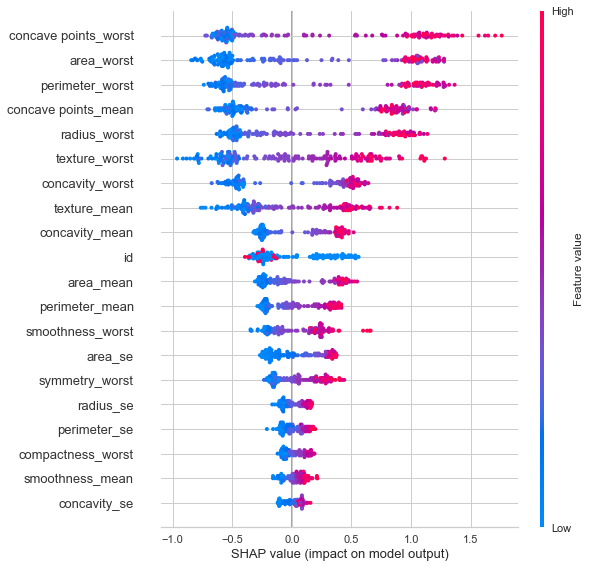

In [23]:
interpret_model(model)

### Model Prediction

In [29]:
pred_holdouts = predict_model(model)
pred_holdouts.head()

id  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0  88147104.0     15.460000       66.620003   329.600006          0.10530   
1   9012795.0     15.100000      141.300003  1386.000000          0.10010   
2    877500.0     20.219999       94.489998   642.700012          0.09872   
3     86408.0     20.760000       82.150002   480.399994          0.09933   
4    912193.0     18.030001       78.290001   455.299988          0.09087   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.07722        0.006643              0.01216         0.1788   
1           0.15150        0.193200              0.12550         0.1973   
2           0.12060        0.118000              0.05980         0.1950   
3           0.12090        0.106500              0.06021         0.1735   
4           0.07838        0.029160              0.01527         0.1464   

   fractal_dimension_mean  ...   area_worst  smoothness_worst  \
0                 0.06450  ...   395.399994            0.1341   
1                 0.06183  ...  1535.000000            0.1192   
2                 0.06466  ...  1044.000000            0.1552   
3                 0.07070  ...   527.400024            0.1287   
4                 0.06284  ...   547.400024            0.1208   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.1153          0.02639               0.04464          0.2615   
1             0.2840          0.40240               0.19660          0.2730   
2             0.4056          0.49670               0.18380          0.4753   
3             0.2250          0.22160               0.11050          0.2226   
4             0.2279          0.16200               0.05690          0.2406   

   fractal_dimension_worst  diagnosis  Label   Score  
0                  0.08269          B      B  0.9995  
1                  0.08666          M      M  0.9901  
2                  0.10130          M      M  0.9932  
3                  0.08486          B      B  0.9532  
4                  0.07729          B      B  0.9991  

[5 rows x 33 columns]

Leveraging `PyCaret` results in a <mark>**model prediction accuracy of 96%**</mark> on the holdout set.

************************************
## Breast Cancer Detection - Deep Learning 
### with fastai

In [30]:
# Import packages
from os import listdir

import pandas as pd
import numpy as np

from fastai.callback.fp16 import *
from fastai.vision.all import *
from fastai import *
from fastai.metrics import error_rate

### Exploratory Data Analysis

In [31]:
path = "./data/images/IDC_regular_ps50_idx5"
files = get_image_files(path)
len(files)

277524

**Load training data**

In [32]:
pattern= r'([^/_]+).png$'
dls = ImageDataLoaders.from_path_re(path, files, pattern, item_tfms=Resize(50),
                                    bs=64, size=50, valid_pct=0.3, seed = 61)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


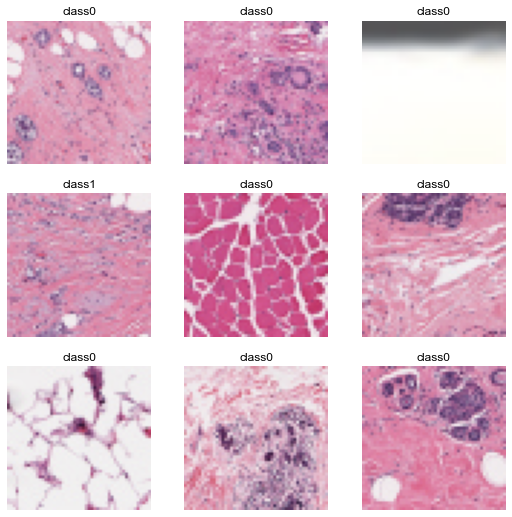

In [33]:
# Class 0 = benign, class 1 = malignant
dls.show_batch()

### Modeling 

I've been learning the [fastai](https://docs.fast.ai/) deep learning library, which also leverages `PyTorch`. The documentation is (IMHO) not well organized, but that is more than made up for with the online courses and the accompanying book. `fastai` streamlines much of the neural network modeling details, allowing me to simply supply model names such as `ResNet18` to the `cnn_learner` method. In addition, many of these models are pre-trained through *transfer learning*, requiring the model to only need to learn the weights of the last layer of the network.  

With transfer learning, we begin with an existing (trained) neural network used for image recognition and then tweak it a bit to train a model for a particular use case. Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images. For this use case, there are approximately 222,000 images in the training set. I am leveraging the `cnn_learner` function for loading a pre-trained `ResNet34` network that was trained on around a million images from the ImageNet database.

In [50]:
# fastai has a pretty cool feature that forces half-precision floating point
# precision training, effectively reducing GPU memory consumption: to_fp16
learn = cnn_learner(dls, models.resnet34, metrics=[accuracy]).to_fp16()

**As a baseline, I will run two different variations of the `fine-tune` method, which takes a pre-trained model and uses one epoch to fit just those parts necessary to fit my dataset.**

In [36]:
%%time
# Run a simple fine-tune for 5 epochs
learn.fine_tune(5)

Wall time: 2h 58min 11s


In [37]:
learn.save('BCPD_Simple5')

Path('data/images/IDC_regular_ps50_idx5/models/BCPD_Simple5.pth')

In [ ]:
learn.load('BCPD_Simple5')

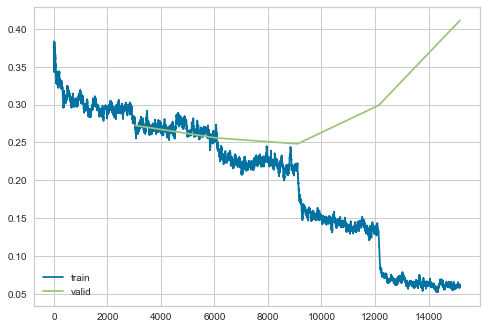

In [38]:
learn.recorder.plot_loss()

**Accuracy peaks at 3 epochs, so we only need to train that far. 89.6% accuracy is good, but I'd really like to see it break 90. I am going to retrain the model on only 3 epochs and then unfreeze all the weights and train the whole model again...**

In [51]:
%%time
learn.fine_tune(3)

Wall time: 48min 10s


In [45]:
%%time
# Hypermaramter tuning
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

AttributeError: 'Sequential' object has no attribute 'plot'

In [46]:
learn.fit_one_cycle(1,slice(1e-7,1e-3))

**Unfreezing the weights resulted in a slighly lower accuracy, but a fairly significant increase in validation loss. I expect this was overfitting, as the train loss went down while the validation loss went up. So I am going to use the previous model that was trained and tuned on 3 epochs.**

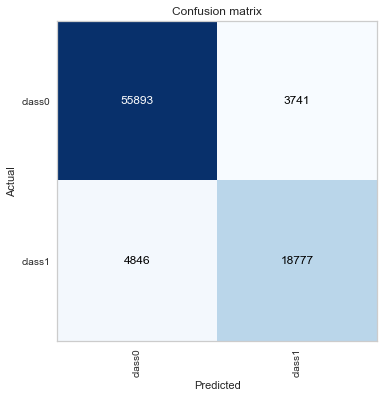

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [53]:
learn.show_results()

In [54]:
len(dls.valid_ds)

83257

In [55]:
# Class 1 images in the validation set
4846+18777

23623

In [57]:
# Calculate sensitivity and specificity
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]

# Sensitivity = True Positive/(True Positive + False Negative)
sensitivity = tp/(tp + fn)

# Specificity = True Negative/(False Positive + True Negative)
# aka Type II error
specificity = tn/(fp + tn)

# Positive Predictive Value aka Type I error
ppv = tp/(tp+fp)

# Negative Predictive Value
npv = tn/(tn+fn)

# Accuracy: sensitivity x prevalence + specificity * (1 - prevalence)
val = dls.valid_ds.cat


# There are 23,623 class 1 images in the valid set (which has a total of 83,257 images 
# and can be checked by using len(dls.valid_ds)).
prevalence = 23623/83257
accuracy = sensitivity * prevalence + specificity * (1 - prevalence)

print("Sensitivity: {}".format(sensitivity))
print("Specificity: {}".format(specificity))
print("Accuracy: {}".format(accuracy))
print("PPV: {}".format(ppv))
print("NPV: {}".format(npv))

Sensitivity: 0.7948609406087288
Specificity: 0.937267330717376
Accuracy: 0.8968615251570438
PPV: 0.8338662403410605
NPV: 0.9202160061904213


****************************
**I am pretty happy with the final model results. While I never did get the accuracy to break 90%, the more important factor for me is a NPV of 92%. If my interpretation is correct, this model predicts false negatives at a rate of 8% (the prevailing rate for humans is closer to 20%!).**  
****************************

#### Side notes on Results Evaluation

*(Note: this entire section was copied whole from [the fastai website](https://docs.fast.ai/tutorial.medical_imaging.html))* 

Medical models are predominantly high impact so it is important to know how good a model is at detecting a certain condition.

`Accuracy` can be defined as the number of correctly predicted data points out of all the data points. However in this context we can define accuracy as the probability that the model is correct and the patient has the condition PLUS the probability that the model is correct and the patient *does not* have the condition.

**Calculating Accuracy**

**accuracy = sensitivity x prevalence + specificity * (1 - prevalence)**

Where **prevalence** is a statistical concept referring to the number of cases of a disease that are present in a particular population at a given time. The prevalence in this case is how many patients in the valid dataset have the condition compared to the total number.

There are some other key terms that need to be used when evaluating medical models:

**False Positive & False Negative**

* **False Positive** is an error in which a test result improperly indicates presence of a condition, such as a disease (the result is positive), when in reality it is not present
* **False Negative** is an error in which a test result improperly indicates no presence of a condition (the result is negative), when in reality it is present  

**Sensitivity & Specificity**

* **Sensitivity or True Positive Rate** is where the model classifies a patient has the disease given the patient actually does have the disease. Sensitivity quantifies the avoidance of false negatives  

Example: A new test was tested on 10,000 patients, if the new test has a sensitivity of 90% the test will correctly detect 9,000 (True Positive) patients but will miss 1000 (False Negative) patients that have the condition but were tested as not having the condition  

* **Specificity or True Negative Rate** is where the model classifies a patient as not having the disease given the patient actually does not have the disease. Specificity quantifies the avoidance of false positives  

[Understanding and using sensitivity, specificity and predictive values](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2636062/) is a great paper if you are interested in learning more about understanding sensitivity, specificity and predictive values.

**PPV and NPV**

Most medical testing is evaluated via PPV (Positive Predictive Value) or NPV (Negative Predictive Value).

**PPV** - if the model predicts a patient has a condition what is the probability that the patient actually has the condition

**NPV** - if the model predicts a patient does not have a condition what is the probability that the patient actually does not have the condition

The ideal value of the PPV, with a perfect test, is 1 (100%), and the worst possible value would be zero

The ideal value of the NPV, with a perfect test, is 1 (100%), and the worst possible value would be zero